# IMPORTS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

# CONFIGURACION

In [ ]:
# Ajustar la configuración de pandas para mostrar más filas y columnas

pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.float_format', '${:,.2f}'.format)  # Formato de números en la tabla

# LECTURA DE ARCHIVOS

In [ ]:
archivo = "inmuebles.csv"

In [ ]:
df_inmueble = pd.read_csv(archivo)

<ipython-input-2278-e8e6ec971209>:1: DtypeWarning: Columns (4,5,6,7,8,13,14,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inmueble = pd.read_csv(archivo)


In [ ]:
df_inmueble.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,cocina_equipada,frigobar,lavarropas,lavavajillas,microondas,quincho,sum,sauna,secarropas,termotanque,vigilancia,ascensor,caja_fuerte,internet,laundry,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,lavadero,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida
0,USD 800.000,$ 60.000,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,Frente,NO,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,True,True,True,True,NaN,True
1,USD 700.000,$ 235.000,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,Frente,S,NaN,1,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,USD 700.000,NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USD 550.000,$ 78.000,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,NaN,N,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USD 550.000,$ 65.000,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ANALISIS EXPLORATORIO

## Conversion de monedas (USD)

In [ ]:
valor_dolar = 1000

### Operaciones en dolares

#### Precio

In [ ]:
df_inmueble = df_inmueble.dropna(subset=['precio'])
df_usd = df_inmueble[df_inmueble['precio'].str.contains('^USD', regex=True)]

In [ ]:
df_usd.loc[:, 'precio'] = df_usd['precio'].str.replace('USD', '').str.replace('.', '').astype(float)

#### Expensas

In [ ]:
df_usd.loc[:, 'expensas'] = df_usd['expensas'].str.replace('$', '').str.replace('.', '').astype(float)

In [ ]:
df_usd.loc[:, 'expensas'] = df_usd['expensas'] / valor_dolar

In [ ]:
df_usd.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,cocina_equipada,frigobar,lavarropas,lavavajillas,microondas,quincho,sum,sauna,secarropas,termotanque,vigilancia,ascensor,caja_fuerte,internet,laundry,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,lavadero,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida
0,"$800,000.00",$60.00,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,Frente,NO,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,True,True,True,True,NaN,True
1,"$700,000.00",$235.00,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,Frente,S,NaN,1,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,"$700,000.00",NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"$550,000.00",$78.00,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,NaN,N,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"$550,000.00",$65.00,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Operaciones en pesos

#### Precio

In [ ]:
df_ars = df_inmueble[df_inmueble['precio'].str.contains('^\$', regex=True)]

In [ ]:
df_dolarizado = df_ars.copy()
df_dolarizado['precio'] = df_dolarizado['precio'].str.replace('$', '').str.replace('.', '')

def es_float(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False

# Elimino aquellos registros que no se puedan castear. Por ejemplo si incluyen otro simbolo de otra moneda.
df_dolarizado = df_dolarizado[df_dolarizado['precio'].apply(es_float)]

df_dolarizado['precio'] = df_dolarizado['precio'].astype(float)

df_dolarizado['precio'] = df_dolarizado['precio'] / valor_dolar

#### Expensas

In [ ]:
df_dolarizado.loc[:, 'expensas'] = df_dolarizado['expensas'].str.replace('$', '').str.replace('.', '').astype(float)

In [ ]:
df_dolarizado.loc[:, 'expensas'] = df_dolarizado['expensas'] / valor_dolar

In [ ]:
df_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,cocina_equipada,frigobar,lavarropas,lavavajillas,microondas,quincho,sum,sauna,secarropas,termotanque,vigilancia,ascensor,caja_fuerte,internet,laundry,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,lavadero,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida
233,"$5,000.00",$440.00,Quintana al 400,"Recoleta, Capital Federal",200,NaN,5,2,4,63 años,Frente,E,Muy luminoso,1,1,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
251,"$4,850.00",$120.00,Av. Azucena Villaflor 489,"Puerto Madero, Capital Federal",160,150,3,2,2,13 años,Frente,E,Muy luminoso,2,2,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN
252,"$4,600.00",$164.00,Av. Libertador 5400. Entre Virrey del pino y V...,"Belgrano, Capital Federal",260,240,7,5,6,60 años,Frente,E,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,"$4,500.00",NaN,AV. Corrientes Abasto - Local 3 al 3400,"Abasto, Capital Federal",230,210,NaN,2,NaN,En construcción,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,"$4,000.00",$25.00,Monoambiente en alquiler en San Cristobal 2200,"San Cristobal, Capital Federal",41,NaN,NaN,NaN,NaN,A estrenar,Contrafrente,NO,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


### Resultado

In [ ]:
df_inmuebles_dolarizado = pd.concat([df_usd, df_dolarizado], axis=0)

In [ ]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,cocina_equipada,frigobar,lavarropas,lavavajillas,microondas,quincho,sum,sauna,secarropas,termotanque,vigilancia,ascensor,caja_fuerte,internet,laundry,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,lavadero,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida
0,"$800,000.00",$60.00,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,Frente,NO,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,True,True,True,True,NaN,True
1,"$700,000.00",$235.00,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,Frente,S,NaN,1,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,"$700,000.00",NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"$550,000.00",$78.00,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,NaN,N,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"$550,000.00",$65.00,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminacion de duplicados

In [ ]:
df_inmuebles_dolarizado.drop_duplicates(inplace=True)

## Unificacion columna Laundry / Lavadero / Lavarropas / Secarropas

In [ ]:
# Opcion 1: si alguno de los 4 es verdadero la columna es verdadera
#df_inmuebles_dolarizado['limpieza_de_ropa'] = df_inmuebles_dolarizado['laundry'] | df_inmuebles_dolarizado['lavadero'] | df_inmuebles_dolarizado['lavarropas'] | df_inmuebles_dolarizado['secarropas']

In [ ]:
# Opcion 2: sumo todos los que sean verdaderos
df_inmuebles_dolarizado[['laundry', 'lavadero', 'lavarropas', 'secarropas']] = df_inmuebles_dolarizado[['laundry', 'lavadero', 'lavarropas', 'secarropas']].notna().astype(int)

df_inmuebles_dolarizado['limpieza_de_ropa'] = df_inmuebles_dolarizado[['laundry', 'lavadero', 'lavarropas', 'secarropas']].sum(axis=1)

In [ ]:
df_inmuebles_dolarizado.drop(['laundry', 'lavadero','lavarropas','secarropas'], axis=1, inplace=True)

In [ ]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,cocina_equipada,frigobar,lavavajillas,microondas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida,limpieza_de_ropa
0,"$800,000.00",$60.00,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,Frente,NO,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,True,True,True,True,NaN,True,1
1,"$700,000.00",$235.00,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,Frente,S,NaN,1,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,1
2,"$700,000.00",NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"$550,000.00",$78.00,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,NaN,N,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"$550,000.00",$65.00,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Equipamiento de cocina

In [ ]:
df_inmuebles_dolarizado[['cocina_equipada', 'frigobar', 'microondas']] = df_inmuebles_dolarizado[['cocina_equipada', 'frigobar', 'microondas']].notna().astype(int)

df_inmuebles_dolarizado['equipamiento_de_cocina'] = df_inmuebles_dolarizado[['cocina_equipada', 'frigobar', 'microondas']].sum(axis=1)

In [ ]:
df_inmuebles_dolarizado.drop(['cocina_equipada', 'frigobar','microondas'], axis=1, inplace=True)

In [ ]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina
0,"$800,000.00",$60.00,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,Frente,NO,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,True,True,True,True,NaN,True,1,0
1,"$700,000.00",$235.00,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,Frente,S,NaN,1,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,1,0
2,"$700,000.00",NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,"$550,000.00",$78.00,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,NaN,N,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,"$550,000.00",$65.00,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## Elimino columna "amoblado" (Repetida)

In [ ]:
df_inmuebles_dolarizado.drop(['amoblado.1'], axis=1, inplace=True)

In [ ]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina
0,"$800,000.00",$60.00,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,Frente,NO,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,True,True,True,True,True,1,0
1,"$700,000.00",$235.00,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,Frente,S,NaN,1,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,1,0
2,"$700,000.00",NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,"$550,000.00",$78.00,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,NaN,N,Muy luminoso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,"$550,000.00",$65.00,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## Valores posiblemente utiles para un analisis

In [ ]:
# Media (Suma de todos los valores dividido la cantidad de valores)
precio_medio = df_inmuebles_dolarizado['precio'].mean()
print(f"Precio medio: {precio_medio}")

Precio medio: 7909.710387878263


In [ ]:
# Mediana (Punto medio de los datos)
precio_mediana = df_inmuebles_dolarizado['precio'].median()
print(f"Precio mediana: {precio_mediana}")

Precio mediana: 600.0


In [ ]:
# Desviacion estandar (Lo que distan de la media los extremos)
precio_desviacion_estandar = df_inmuebles_dolarizado['precio'].std()
print(f"Precio desviacion estandar: {precio_desviacion_estandar}")

Precio desviacion estandar: 100761.8280083498


In [ ]:
# Precio minimo
precio_minimo = df_inmuebles_dolarizado['precio'].min()
print(f"Precio minimo: {precio_minimo}")

Precio minimo: 0.001


In [ ]:
# Precio maximo
precio_maximo = df_inmuebles_dolarizado['precio'].max()
print(f"Precio maximo: {precio_maximo}")

Precio maximo: 3850000.0


## Ordeno de mayor a menor

In [ ]:
df_inmuebles_dolarizado = df_inmuebles_dolarizado.sort_values(by='precio', ascending=False)

In [ ]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina
52,"$3,850,000.00","$1,990.00",Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25 años,NaN,NaN,Muy luminoso,3,1,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,True,True,True,True,True,True,True,NaN,True,1,0
61,"$3,800,000.00",$990.00,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22 años,NaN,NaN,Muy luminoso,3,1,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,True,True,True,NaN,True,1,0
105,"$3,500,000.00",$900.00,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28 años,NaN,NaN,NaN,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
152,"$2,800,000.00",$990.00,Demaría 4500,"Palermo, Capital Federal",400,390,6,6,3,25 años,NaN,NaN,Muy luminoso,2,1,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,True,True,True,NaN,True,1,0
9542,"$2,800,000.00",$250.00,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,A estrenar,Frente,NaN,Muy luminoso,2,1,NaN,True,NaN,True,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,True,True,True,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,True,True,True,NaN,True,NaN,NaN,2,1


## Modifico booleanos a enteros

In [ ]:
object_columns = df_inmuebles_dolarizado.select_dtypes(include=['object']).columns
df_inmuebles_dolarizado[object_columns] = df_inmuebles_dolarizado[object_columns].astype(str)
df_inmuebles_dolarizado = df_inmuebles_dolarizado.replace('True', 1)
df_inmuebles_dolarizado = df_inmuebles_dolarizado.fillna(0)
df_inmuebles_dolarizado = df_inmuebles_dolarizado.replace('nan', 0)

In [ ]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,disposicion,orientacion,luminosidad,cantidad_de_cocheras,cantidad_de_toiletes,estado_general,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina
52,3850000.0,1990.0,Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25 años,0,0,Muy luminoso,3,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0
61,3800000.0,990.0,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22 años,0,0,Muy luminoso,3,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0
105,3500000.0,900.0,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28 años,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,2800000.0,990.0,Demaría 4500,"Palermo, Capital Federal",400,390,6,6,3,25 años,0,0,Muy luminoso,2,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0
9542,2800000.0,250.0,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,A estrenar,Frente,0,Muy luminoso,2,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,2,1


## One hot encoding

In [ ]:
df_inmuebles = pd.get_dummies(df_inmuebles_dolarizado, columns=['disposicion', 'orientacion', 'luminosidad','estado_general'], drop_first=True)

In [ ]:
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado
52,3850000.0,1990.0,Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25 años,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
61,3800000.0,990.0,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22 años,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
105,3500000.0,900.0,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28 años,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,2800000.0,990.0,Demaría 4500,"Palermo, Capital Federal",400,390,6,6,3,25 años,2,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9542,2800000.0,250.0,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,A estrenar,2,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,2,1,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
booleanos = df_inmuebles.select_dtypes(include=['bool']).columns

df_inmuebles[booleanos] = df_inmuebles[booleanos].astype(int)

In [ ]:
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado
52,3850000.0,1990.0,Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25 años,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
61,3800000.0,990.0,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22 años,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
105,3500000.0,900.0,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28 años,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,2800000.0,990.0,Demaría 4500,"Palermo, Capital Federal",400,390,6,6,3,25 años,2,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9542,2800000.0,250.0,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,A estrenar,2,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Modificar antiguedad

In [ ]:
df_inmuebles['antiguedad'] = df_inmuebles['antiguedad'].str.extract(r'(\d+)', expand=False)
df_inmuebles['antiguedad'] = pd.to_numeric(df_inmuebles['antiguedad']).fillna(0).astype(int)

In [ ]:
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado
52,3850000.0,1990.0,Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
61,3800000.0,990.0,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
105,3500000.0,900.0,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,2800000.0,990.0,Demaría 4500,"Palermo, Capital Federal",400,390,6,6,3,25,2,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9542,2800000.0,250.0,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,0,2,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Casteo de tipos de datos

In [ ]:
columnas_a_convertir = [
    'cantidad_de_toiletes', 'cantidad_de_cocheras', 'cantidad_de_dormitorios',
    'cantidad_de_banios', 'superficie_total', 'superficie_cubierta', 'cantidad_de_ambiente'
]

for col in columnas_a_convertir:
    df_inmuebles[col] = pd.to_numeric(df_inmuebles[col], errors='coerce').fillna(0).astype('int64')

df_inmuebles['expensas'] = pd.to_numeric(df_inmuebles['expensas'], errors='coerce').fillna(0).astype('int64')
df_inmuebles['precio'] = pd.to_numeric(df_inmuebles['precio'], errors='coerce').fillna(0).astype('int64')

## Elimino los que no tienen precio o cantidad de metros cuadrados

In [ ]:
df_inmuebles = df_inmuebles[df_inmuebles['superficie_total'] != 0]
df_inmuebles = df_inmuebles[df_inmuebles['precio'] != 0]

## Precio por metro cuadrado

In [ ]:
df_inmuebles['precio_m2'] = df_inmuebles['precio'] / df_inmuebles['superficie_total']
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2
52,3850000,1990,Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"$9,625.00"
61,3800000,990,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22,3,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"$9,500.00"
105,3500000,900,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"$9,210.53"
152,2800000,990,Demaría 4500,"Palermo, Capital Federal",400,390,6,6,3,25,2,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"$7,000.00"
9542,2800000,250,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,0,2,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"$35,897.44"


## Eliminar outliers



In [ ]:
# NO SE SI ES MEJOR APLICAR LA TECNICA INTERCUARTIL CON precio_m2 o precio

def eliminar_outliers(grupo):
    Q1 = grupo['precio_m2'].quantile(0.25)
    Q3 = grupo['precio_m2'].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['precio_m2'] >= umbral_inferior) & (grupo['precio_m2'] <= umbral_superior)]

# Agrupa por 'barrio' y elimina los outliers
df_inmuebles = df_inmuebles.groupby('localidad').apply(eliminar_outliers).reset_index(drop=True)
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2
0,4500,0,AV. Corrientes Abasto - Local 3 al 3400,"Abasto, Capital Federal",230,217,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$19.57
1,4500,0,AV. Corrientes Abasto - Local 3 al 3400,"Abasto, Capital Federal",230,210,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$19.57
2,3500,0,AV Corrientes al 3400,"Abasto, Capital Federal",270,210,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$12.96
3,800,0,Avenida Córdoba 2700,"Abasto, Capital Federal",72,50,3,1,2,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,$11.11
4,700,0,Gallo al 600,"Abasto, Capital Federal",70,70,3,2,2,20,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$10.00


In [ ]:
def eliminar_outliers(grupo):
    Q1 = grupo['precio'].quantile(0.25)
    Q3 = grupo['precio'].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['precio'] >= umbral_inferior) & (grupo['precio'] <= umbral_superior)]

# Agrupa por 'barrio' y elimina los outliers
df_inmuebles = df_inmuebles.groupby('localidad').apply(eliminar_outliers).reset_index(drop=True)
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2
0,800,0,Avenida Córdoba 2700,"Abasto, Capital Federal",72,50,3,1,2,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,$11.11
1,700,0,Gallo al 600,"Abasto, Capital Federal",70,70,3,2,2,20,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$10.00
2,690,150,Gallo 955,"Abasto, Capital Federal",52,50,2,1,1,13,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,$13.27
3,690,150,Gallo 955,"Abasto, Capital Federal",52,50,2,1,1,13,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,$13.27
4,600,0,Jean Jaures 990,"Abasto, Capital Federal",45,45,3,1,2,50,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,$13.33


In [ ]:
print(len(df_inmuebles))

9962


## Elimino los que no tienen localidad

In [ ]:
df_inmuebles = df_inmuebles.fillna(0)

df_inmuebles = df_inmuebles[df_inmuebles['localidad'] != 0]
print(len(df_inmuebles))

9962


## Elimino localidades erroneas

In [ ]:
df_inmuebles = df_inmuebles[df_inmuebles["localidad"] != "Otro, Capital Federal"]

## Target encoding localidad

In [ ]:
#ONE HOT ENCODING
#df_inmuebles = pd.get_dummies(df_inmuebles, columns=['localidad'], drop_first=True)

#booleanos = df_inmuebles.select_dtypes(include=['bool']).columns

#df_inmuebles[booleanos] = df_inmuebles[booleanos].astype(int)
#df_inmuebles = df_inmuebles.drop(['localidad'], axis=1)

# TARGET ENCODING PRECIO M2 Y PRECIO
mean_encoded = df_inmuebles.groupby('localidad')['precio_m2'].mean()
df_inmuebles['precio_m2_medio_localidad'] = df_inmuebles['localidad'].map(mean_encoded)

print(mean_encoded)

mean_encoded = df_inmuebles.groupby('localidad')['precio'].mean()
df_inmuebles['precio_medio_localidad'] = df_inmuebles['localidad'].map(mean_encoded)



df_inmuebles = df_inmuebles.drop(['localidad'], axis=1)
df_inmuebles.head()

localidad
Abasto, Capital Federal                     $9.52
Agronomía, Capital Federal                  $7.93
Almagro Norte, Almagro                      $9.07
Almagro Sur, Almagro                        $8.60
Almagro, Capital Federal                    $8.97
Balvanera, Capital Federal                  $7.98
Barracas, Capital Federal                   $8.27
Barrio Chino, Belgrano                     $12.18
Barrio Norte, Capital Federal               $9.40
Barrio Parque General Belgrano, Belgrano   $12.54
Barrio Parque, Palermo                     $16.55
Belgrano C, Belgrano                       $10.98
Belgrano Chico, Belgrano                   $12.12
Belgrano R, Belgrano                       $10.84
Belgrano, Capital Federal                  $11.29
Boedo, Capital Federal                      $8.44
Botánico, Palermo                          $12.60
Caballito Norte, Caballito                  $8.82
Caballito Sur, Caballito                    $8.76
Caballito, Capital Federal              

,precio,expensas,direccion,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2,precio_m2_medio_localidad,precio_medio_localidad
0,800,0,Avenida Córdoba 2700,72,50,3,1,2,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,$11.11,$9.52,$418.18
1,700,0,Gallo al 600,70,70,3,2,2,20,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$10.00,$9.52,$418.18
2,690,150,Gallo 955,52,50,2,1,1,13,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,$13.27,$9.52,$418.18
3,690,150,Gallo 955,52,50,2,1,1,13,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,$13.27,$9.52,$418.18
4,600,0,Jean Jaures 990,45,45,3,1,2,50,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,$13.33,$9.52,$418.18


## Elimino direccion

In [ ]:
df_inmuebles = df_inmuebles.drop(['direccion'], axis=1)

## Elimino expensas

In [ ]:
df_inmuebles = df_inmuebles.drop(['expensas'], axis=1)

## Ordeno de mayor a menor

In [ ]:
df_inmuebles = df_inmuebles.sort_values(by='precio', ascending=False)

## Filtro por diferencia entre precio m2 y precio m2 promedio de la localidad

In [ ]:
# Puse 25% de diferencia por que me parecio un numero razonable, los modelos se adaptan bien y el dataset no se acorta tanto.
lower_limit = df_inmuebles['precio_m2_medio_localidad'] * 0.25
upper_limit = df_inmuebles['precio_m2_medio_localidad'] * 1.25

print(len(df_inmuebles))
df_inmuebles = df_inmuebles[(df_inmuebles['precio_m2'] >= lower_limit) & (df_inmuebles['precio_m2'] <= upper_limit)]
print(len(df_inmuebles))

9960
8276


# CREAR CSV

In [ ]:
df_inmuebles.to_csv('df_inmuebles.csv', index=False)

# GRAFICOS

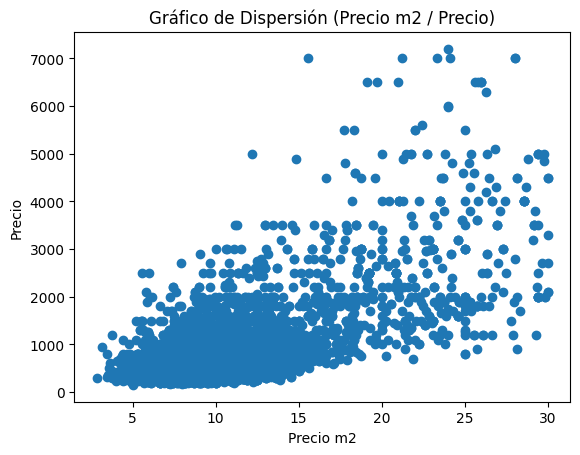

In [ ]:
# GRAFICO DE DISPERSON PRECIO M2 / PRECIO

plt.scatter(df_inmuebles['precio_m2'], df_inmuebles['precio'])

plt.title('Gráfico de Dispersión (Precio m2 / Precio)')
plt.xlabel('Precio m2')
plt.ylabel('Precio')

plt.show()

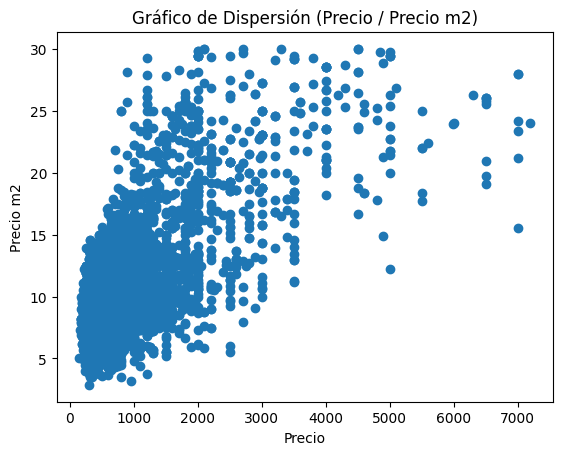

In [ ]:
# GRAFICO DE DISPERSON PRECIO / PRECIO M2

plt.scatter(df_inmuebles['precio'], df_inmuebles['precio_m2'])

plt.title('Gráfico de Dispersión (Precio / Precio m2)')
plt.xlabel('Precio')
plt.ylabel('Precio m2')

plt.show()

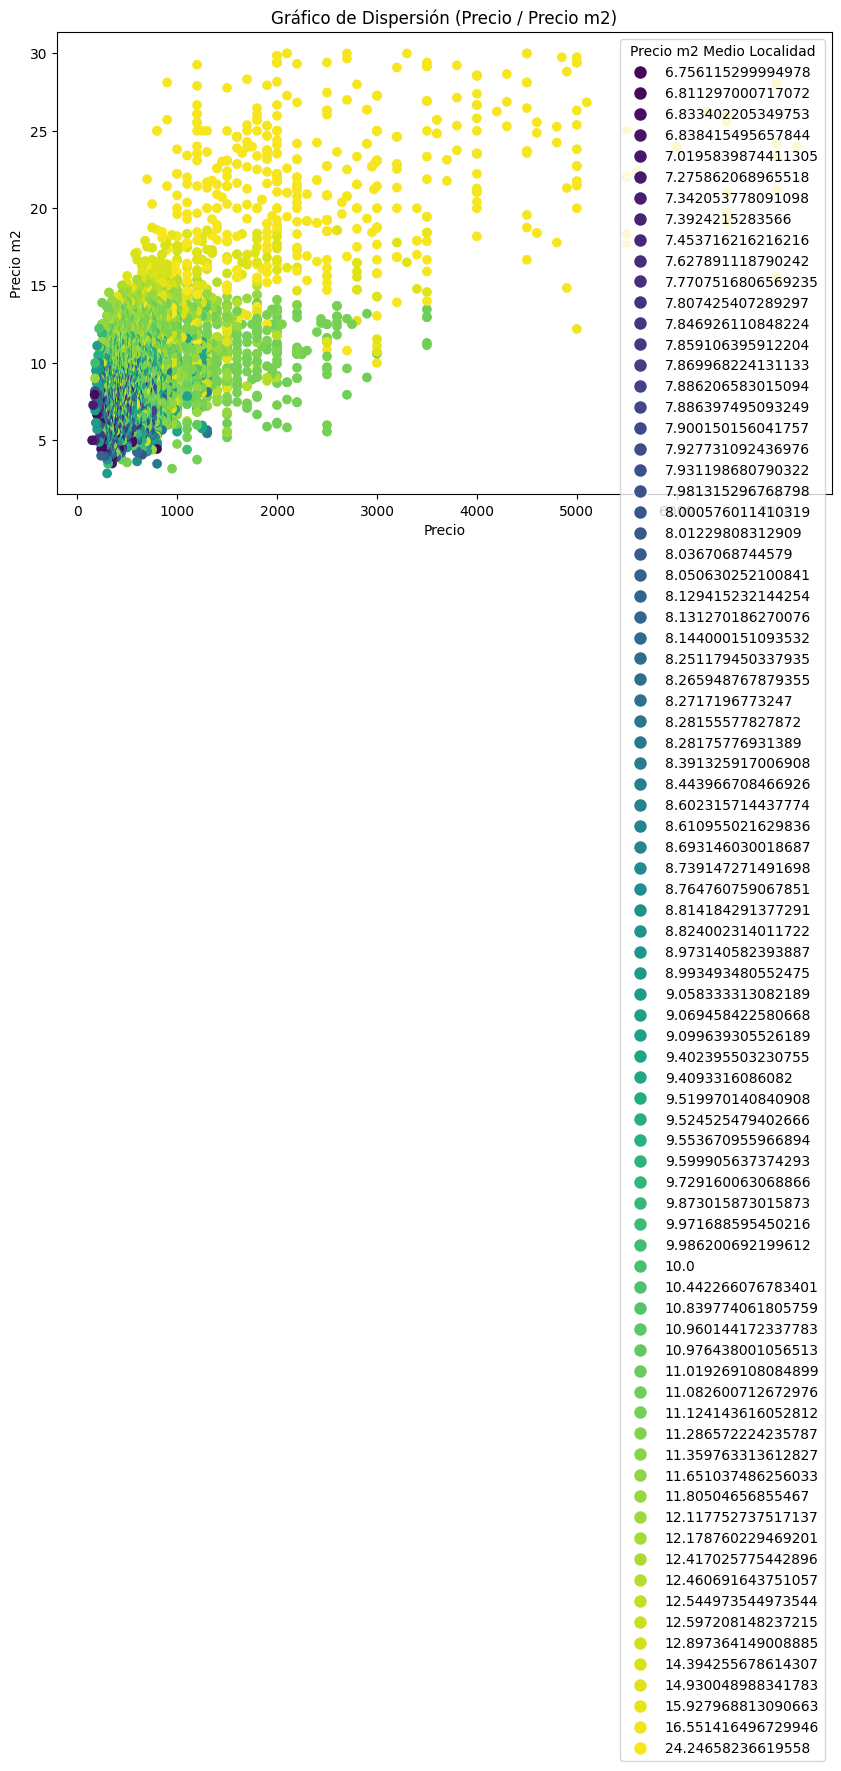

In [ ]:
unique_values = np.sort(df_inmuebles['precio_m2_medio_localidad'].unique())
palette = sns.color_palette("viridis", len(unique_values))
color_dict = {value: palette[i] for i, value in enumerate(unique_values)}

# Asignar colores a cada punto
colors = df_inmuebles['precio_m2_medio_localidad'].map(color_dict)

plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df_inmuebles['precio'], df_inmuebles['precio_m2'], c=colors)

plt.title('Gráfico de Dispersión (Precio / Precio m2)')
plt.xlabel('Precio')
plt.ylabel('Precio m2')

# Crear una leyenda personalizada
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[val], markersize=10) for val in unique_values]
labels = [str(val) for val in unique_values]
plt.legend(handles, labels, title='Precio m2 Medio Localidad')

plt.show()

# MODELO

In [ ]:
df_inmuebles.head()

,precio,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,alarma,amoblado,caldera,calefacción,cancha_deportes,lavavajillas,quincho,sum,sauna,termotanque,vigilancia,ascensor,caja_fuerte,internet,servicio_de_limpieza,balcon,dependencia_servicio,dormitorio_en_suite,jardin,patio,terraza,apto_profesional,gimnasio,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,acceso_movilidad_reducida,limpieza_de_ropa,equipamiento_de_cocina,disposicion_Contrafrente,disposicion_Frente,disposicion_Interno,disposicion_Lateral,orientacion_E,orientacion_N,orientacion_NE,orientacion_NO,orientacion_O,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2,precio_m2_medio_localidad,precio_medio_localidad
6546,7200,300,300,6,5,3,8,2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$24.00,$24.25,"$2,731.27"
6549,7000,330,330,5,5,3,8,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,$21.21,$24.25,"$2,731.27"
6547,7000,450,260,4,3,3,0,3,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,$15.56,$24.25,"$2,731.27"
6554,7000,250,190,4,5,3,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,$28.00,$24.25,"$2,731.27"
6551,7000,290,290,4,4,3,6,2,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,$24.14,$24.25,"$2,731.27"


## Random Forest Regressor

In [ ]:
X = df_inmuebles.drop('precio', axis=1)
y = df_inmuebles['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Un MSE significativamente menor que la varianza de los datos objetivo indica que el modelo está haciendo predicciones razonables.
varianza_y = np.var(y_test)
print("Varianza: ", varianza_y)


Mean Squared Error: 3034.9844362318845
Varianza:  479446.5445251786


Cantidad de registros:  8276

Tabla de Comparación:
          Precio Real ($)  Precio Predicho ($)  Error Absoluto ($)  \
1520              $900.00              $898.90               $1.10   
5921              $550.00              $552.74               $2.74   
4626              $360.00              $355.70               $4.30   
5732              $700.00              $698.60               $1.40   
629               $850.00              $850.69               $0.69   
5269              $750.00              $753.20               $3.20   
4604              $500.00              $497.52               $2.48   
4275              $450.00              $449.40               $0.60   
3571              $250.00              $249.40               $0.60   
9077              $430.00              $427.35               $2.65   
1126              $620.00              $638.00              $18.00   
1203              $750.00              $750.95               $0.95   
6880            $2,300.00            $

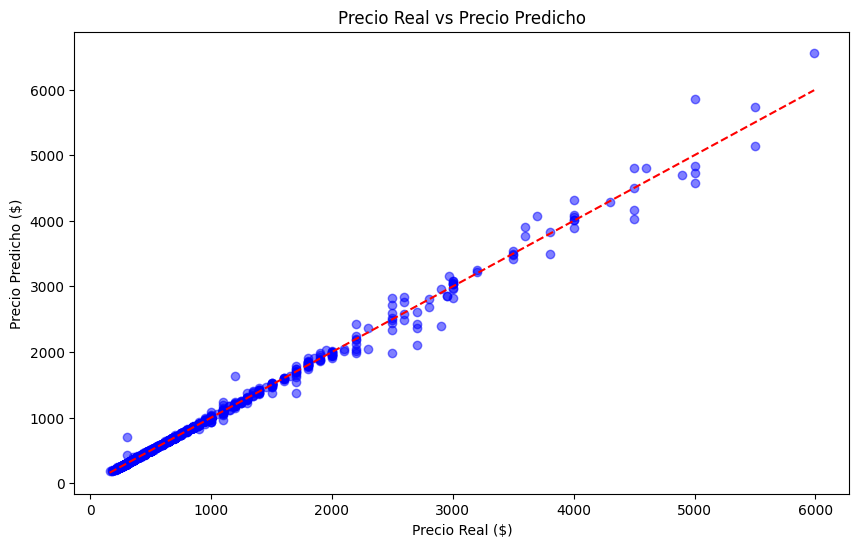

In [ ]:
errores_absolutos = [abs(real - pred) for real, pred in zip(y_test, y_pred)]
errores_cuadraticos = [(real - pred)**2 for real, pred in zip(y_test, y_pred)]

df_comparacion = pd.DataFrame({
    'Precio Real ($)': y_test,
    'Precio Predicho ($)': y_pred,
    'Error Absoluto ($)': errores_absolutos,
    'Error Cuadrático ($²)': errores_cuadraticos
})

df_comparacion.loc['Promedio'] = df_comparacion.mean()

print("Cantidad de registros: ", len(df_inmuebles))

print("\nTabla de Comparación:")
print(df_comparacion)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Precio Real vs Precio Predicho')
plt.show()

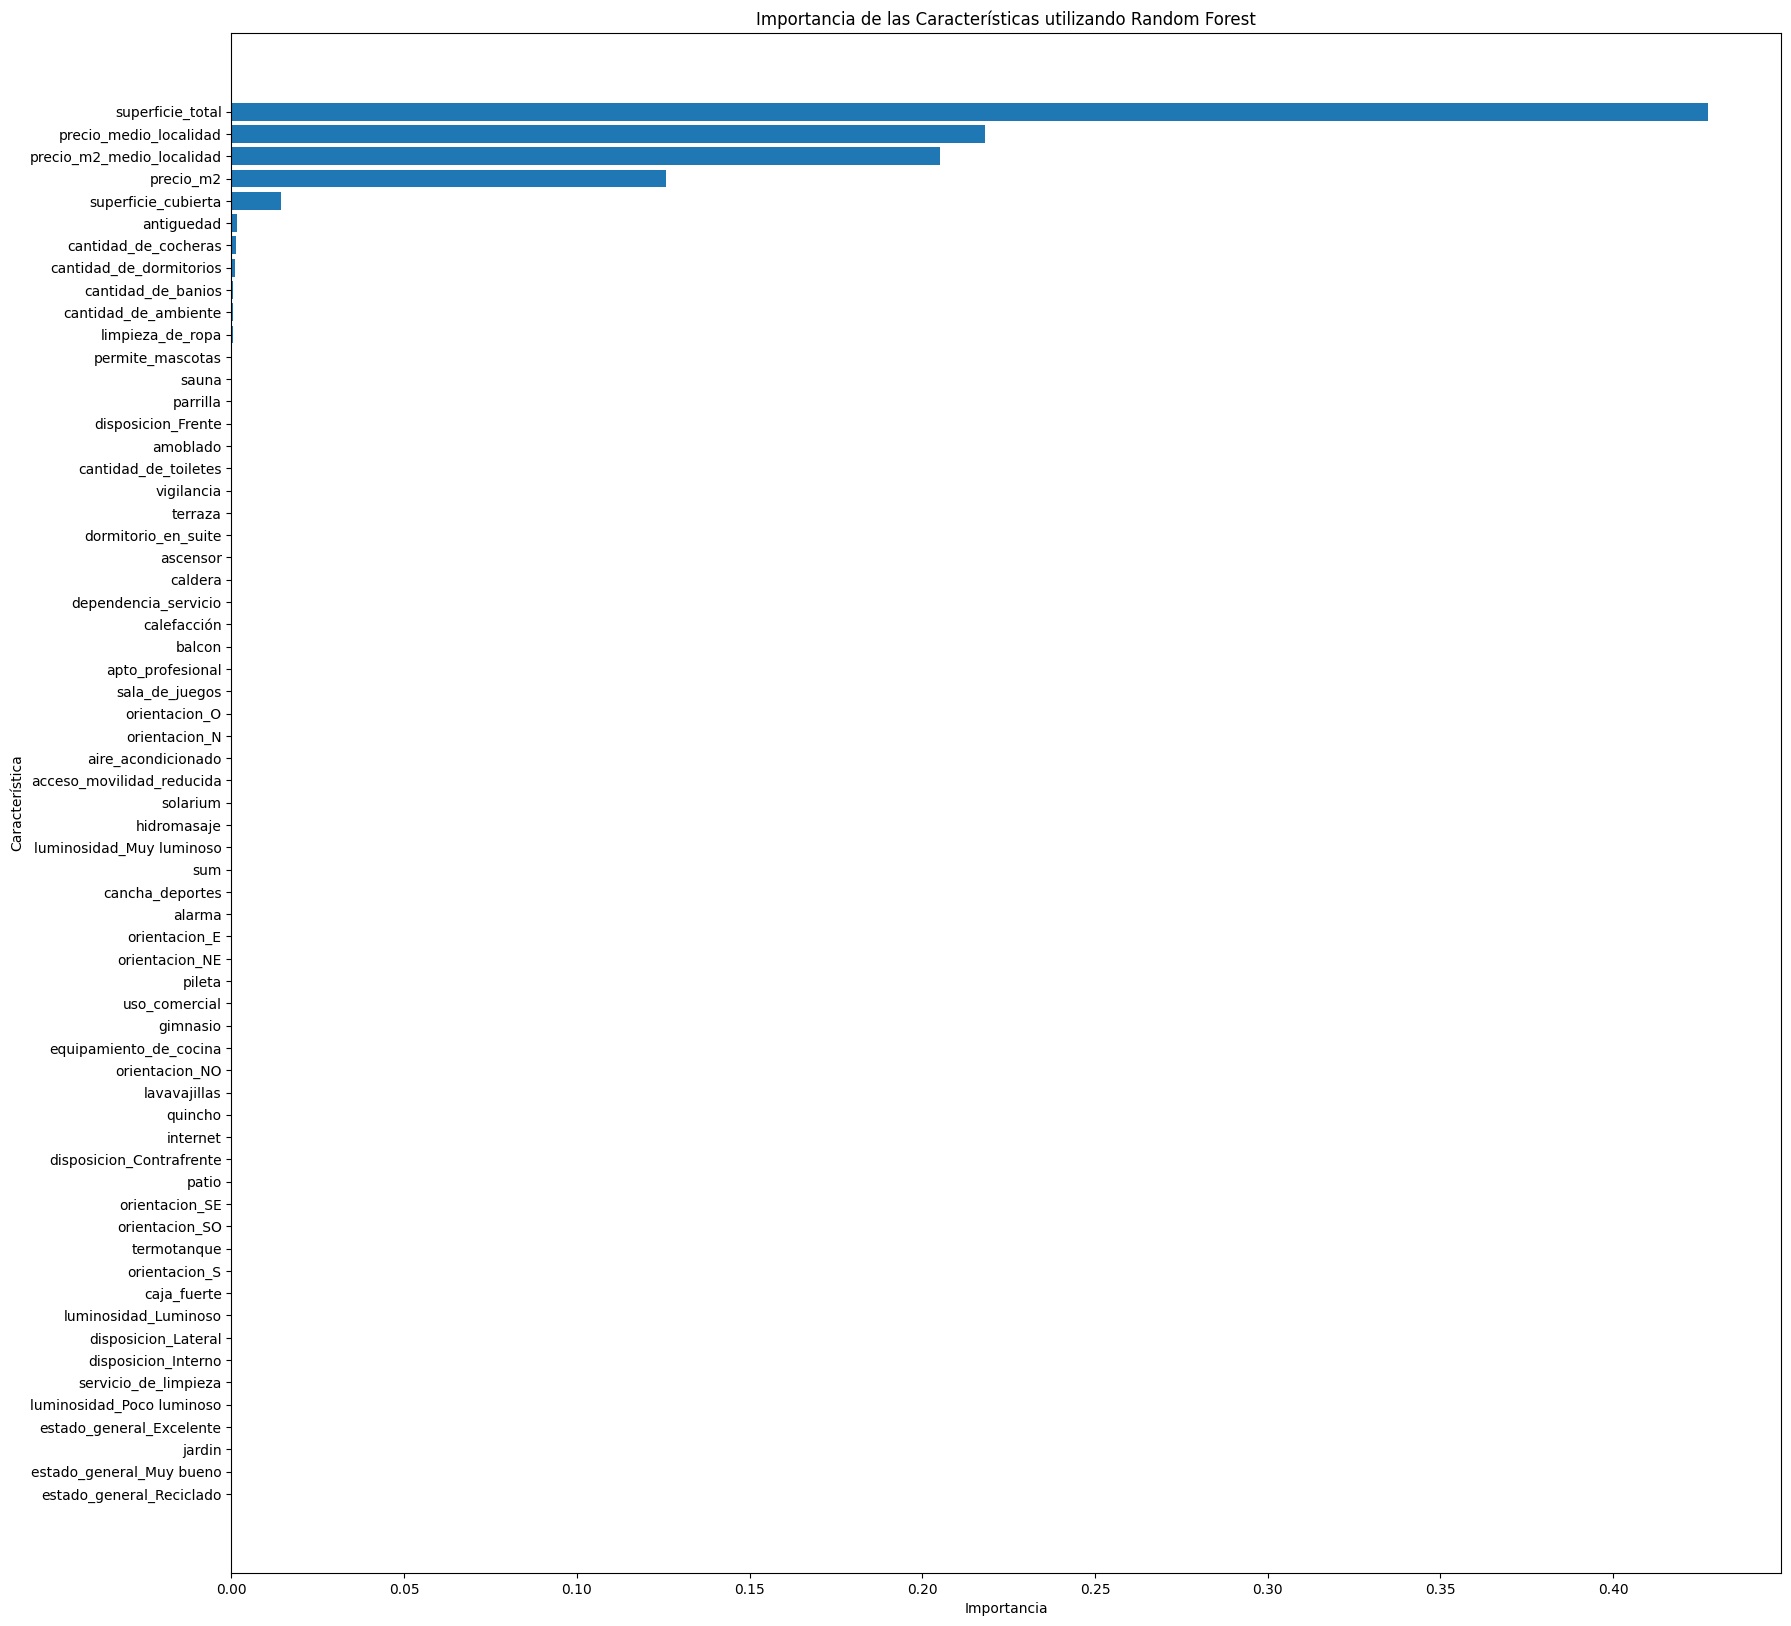

In [ ]:
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(20, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características utilizando Random Forest')
plt.gca().invert_yaxis()
plt.show()

## XGB

In [ ]:
X = df_inmuebles.drop('precio', axis=1)
y = df_inmuebles['precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Un MSE significativamente menor que la varianza de los datos objetivo indica que el modelo está haciendo predicciones razonables.
varianza_y = np.var(y_test)
print("Varianza: ", varianza_y)

Mean Squared Error: 2881.1086067545025
Varianza:  479446.5445251786


Cantidad de registros:  8276

Tabla de Comparación:
          Precio Real ($)  Precio Predicho ($)  Error Absoluto ($)  \
1520              $900.00              $888.32              $11.68   
5921              $550.00              $551.45               $1.45   
4626              $360.00              $347.26              $12.74   
5732              $700.00              $696.88               $3.12   
629               $850.00              $839.20              $10.80   
5269              $750.00              $737.88              $12.12   
4604              $500.00              $486.96              $13.04   
4275              $450.00              $448.81               $1.19   
3571              $250.00              $249.93               $0.07   
9077              $430.00              $426.71               $3.29   
1126              $620.00              $636.65              $16.65   
1203              $750.00              $739.75              $10.25   
6880            $2,300.00            $

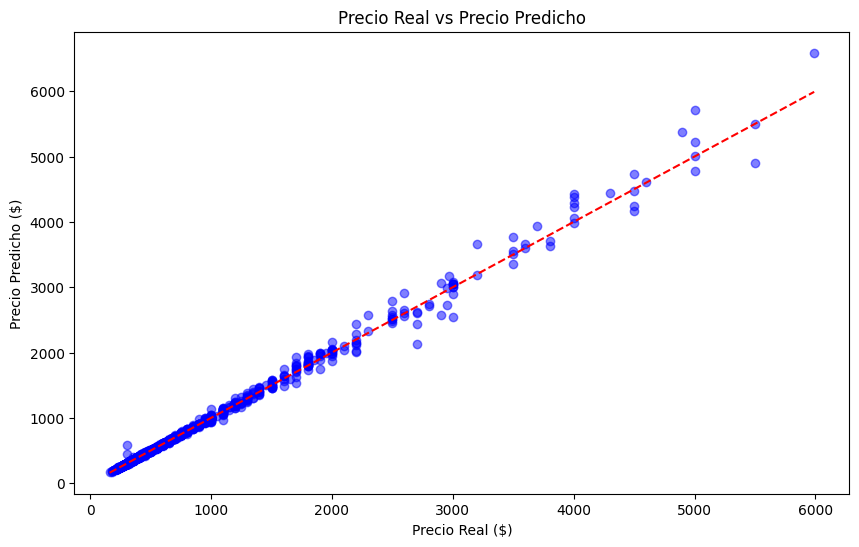

In [ ]:
errores_absolutos = [abs(real - pred) for real, pred in zip(y_test, y_pred)]
errores_cuadraticos = [(real - pred)**2 for real, pred in zip(y_test, y_pred)]

df_comparacion = pd.DataFrame({
    'Precio Real ($)': y_test,
    'Precio Predicho ($)': y_pred,
    'Error Absoluto ($)': errores_absolutos,
    'Error Cuadrático ($²)': errores_cuadraticos
})

df_comparacion.loc['Promedio'] = df_comparacion.mean()

print("Cantidad de registros: ", len(df_inmuebles))

print("\nTabla de Comparación:")
print(df_comparacion)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Precio Real vs Precio Predicho')
plt.show()

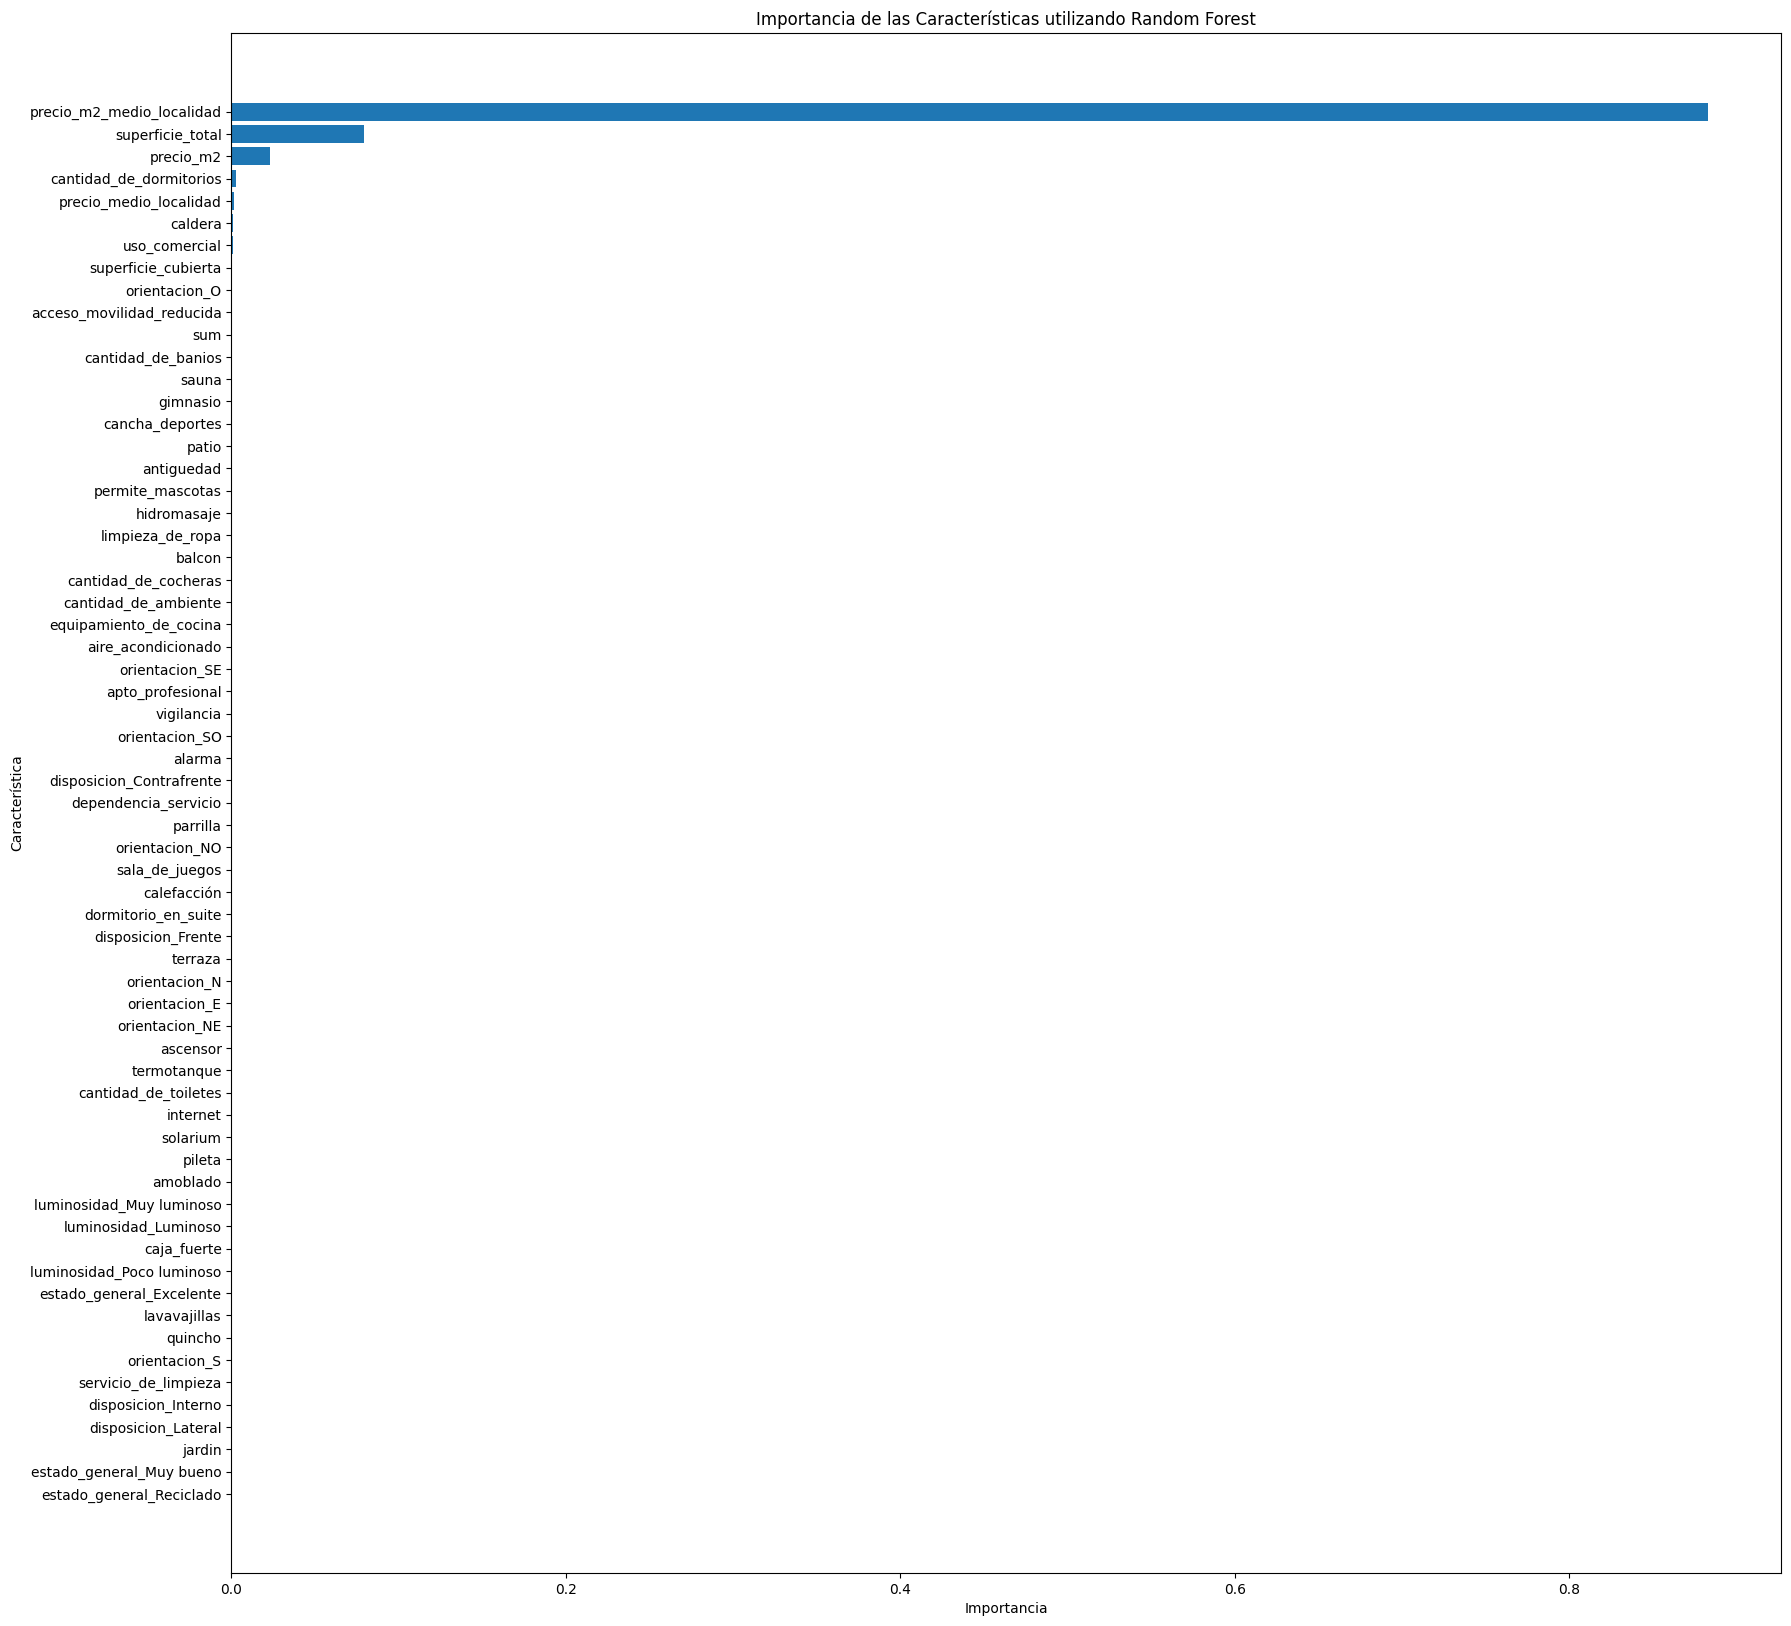

In [ ]:
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(20, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características utilizando Random Forest')
plt.gca().invert_yaxis()
plt.show()

## KNN

In [ ]:
X = df_inmuebles.drop('precio', axis=1)
y = df_inmuebles['precio']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo KNN
model = KNeighborsRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular el Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Un MSE significativamente menor que la varianza de los datos objetivo indica que el modelo está haciendo predicciones razonables.
varianza_y = np.var(y_test)
print("Varianza: ", varianza_y)

Mean Squared Error: 75584.18830917875
Varianza:  479446.5445251786


## Random Forest solo con features con importancia mayor al 0,01

In [ ]:
# Supongamos que tienes un DataFrame df con las columnas relevantes
# Separar características y objetivo
X = df_inmuebles.drop(columns=['precio'])
y = df_inmuebles['precio']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Ordenar las características por importancia
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

# Seleccionar las características más importantes
selected_features = feature_importances[feature_importances > 0.01].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Entrenar el modelo de nuevo con las características seleccionadas
model_selected = RandomForestRegressor()
model_selected.fit(X_train_selected, y_train)

# Evaluar el modelo
y_pred = model_selected.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with selected features: {mse}")

superficie_total            $0.43
precio_m2_medio_localidad   $0.27
precio_medio_localidad      $0.17
precio_m2                   $0.12
superficie_cubierta         $0.01
antiguedad                  $0.00
cantidad_de_dormitorios     $0.00
cantidad_de_cocheras        $0.00
cantidad_de_banios          $0.00
cantidad_de_ambiente        $0.00
limpieza_de_ropa            $0.00
sauna                       $0.00
dormitorio_en_suite         $0.00
permite_mascotas            $0.00
vigilancia                  $0.00
ascensor                    $0.00
balcon                      $0.00
cantidad_de_toiletes        $0.00
aire_acondicionado          $0.00
dependencia_servicio        $0.00
amoblado                    $0.00
cancha_deportes             $0.00
gimnasio                    $0.00
caldera                     $0.00
parrilla                    $0.00
terraza                     $0.00
calefacción                 $0.00
apto_profesional            $0.00
disposicion_Frente          $0.00
solarium      